Nhập thư viện và đọc dữ liệu từ file

In [1]:
import pandas as pd
import seaborn as sns
import dython
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = pd.read_csv("data.csv",sep=";")

## 1. Khám phá dữ liệu (Exploratory Data Analysis - EDA)

### a. Tóm tắt thông tin dữ liệu:

In [2]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [3]:
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


cái df này nó chỉ có cột target là cat thôi vì trên uci nó đã label encode r lọc ra thành mấy cột integer r nên h đi tìm lại để tìm tương quan

In [4]:
cat_cols = df.select_dtypes(include=["object"])
print(cat_cols.columns)

Index(['Target'], dtype='object')


In [5]:
num_cols = df.select_dtypes(include=['number'])
print(num_cols.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [6]:
cat_like = [col for col in df.columns if df[col].nunique() < 50]
print(cat_like)

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']


In [7]:
to_remove = [
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

cat_columns = [col for col in cat_like if col not in to_remove]
ordinal_column = ["Application order"]
print(cat_columns)

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']


#### Kiểm tra số lượng bản ghi, số lượng biến số, kiểu dữ liệu của từng biến.


In [8]:
print(df.dtypes)


Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [9]:
df.shape

(4424, 37)

#### Xử lý dữ liệu thiếu, dữ liệu trùng lặp (nếu có).


In [10]:
print(df.isna().sum())
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

### b. Phân tích thống kê mô tả

#### Tính các thống kê như trung bình, trung vị, độ lệch chuẩn, tứ phân vị.


In [11]:
df_numeric = df.drop(columns=cat_columns)
df_numeric.describe()


,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


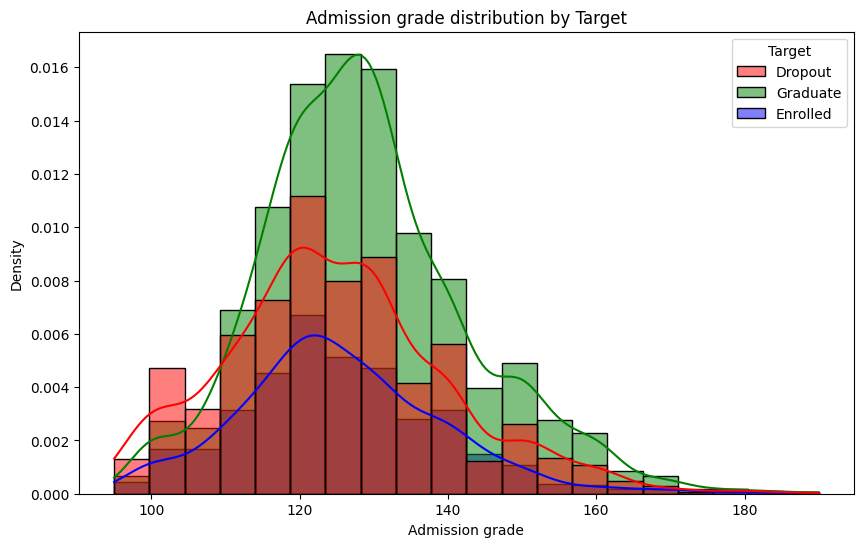

In [12]:
plt.figure(figsize=(10,6))

# Histogram split by target
sns.histplot(
    data=df,
    x='Admission grade',
    hue='Target',        # separates Dropout vs Graduate
    bins=20,             # adjust for clarity
    kde=True,            # optional: overlay density
    stat='density',      # normalize for comparison
    palette=['red', 'green','blue'],
    alpha=0.5
)

plt.title('Admission grade distribution by Target')
plt.xlabel('Admission grade')
plt.ylabel('Density')
plt.show()


#### Trực quan hoá bằng các biểu đồ phù hợp (ít nhất 3 loại biểu đồ) để nhận

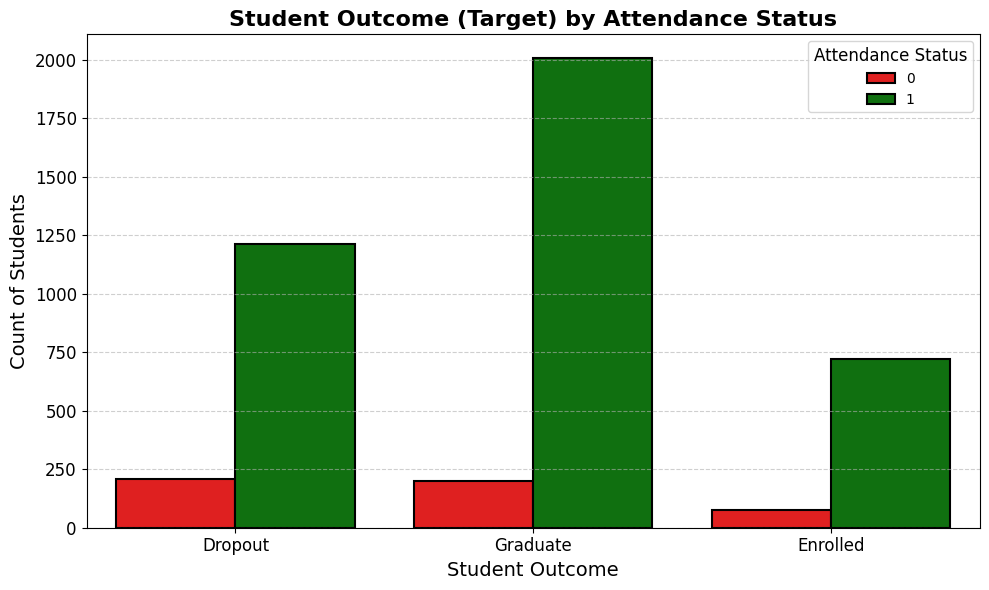

In [13]:
plt.figure(figsize=(10, 6))

# Create a countplot:
# x-axis: The outcome (Target)
# hue: The secondary variable used to group the bars (Attendance Status)
# palette: Uses the same color scheme as the previous example (reds/greens) for consistency
sns.countplot(
    data=df,
    x='Target',
    hue='Daytime/evening attendance\t',
    palette={'green','red'},
    edgecolor='black',
    linewidth=1.5
)

# --- 3. CUSTOMIZE PLOT AESTHETICS ---
plt.title('Student Outcome (Target) by Attendance Status', fontsize=16, fontweight='bold')
plt.xlabel('Student Outcome', fontsize=14)
plt.ylabel('Count of Students', fontsize=14)
plt.legend(title='Attendance Status', title_fontsize='12', fontsize='10')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

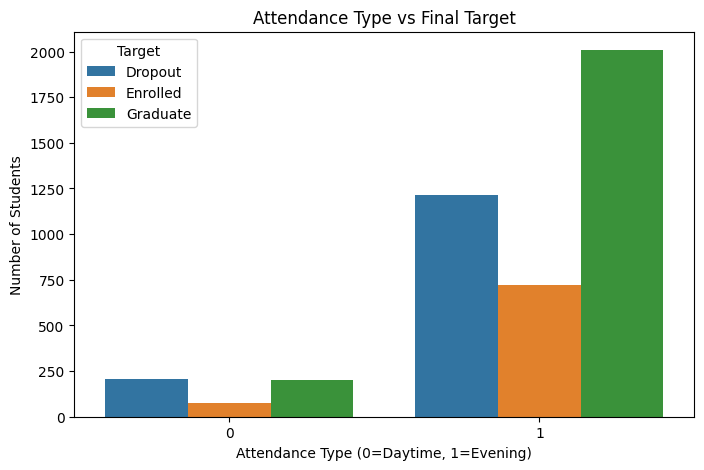

In [14]:
# Assuming df is your DataFrame
attendance_col = 'Daytime/evening attendance\t'  # keep the tab if it's in the column name
target_col = 'Target'

# Count occurrences
counts = df.groupby([attendance_col, target_col]).size().reset_index(name='count')

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=counts, x=attendance_col, y='count', hue=target_col)
plt.xlabel('Attendance Type (0=Daytime, 1=Evening)')
plt.ylabel('Number of Students')
plt.title('Attendance Type vs Final Target')
plt.legend(title='Target')
plt.show()


this data makes sense specially for this dataset since this is A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. 

i.e. they have jobs in the day


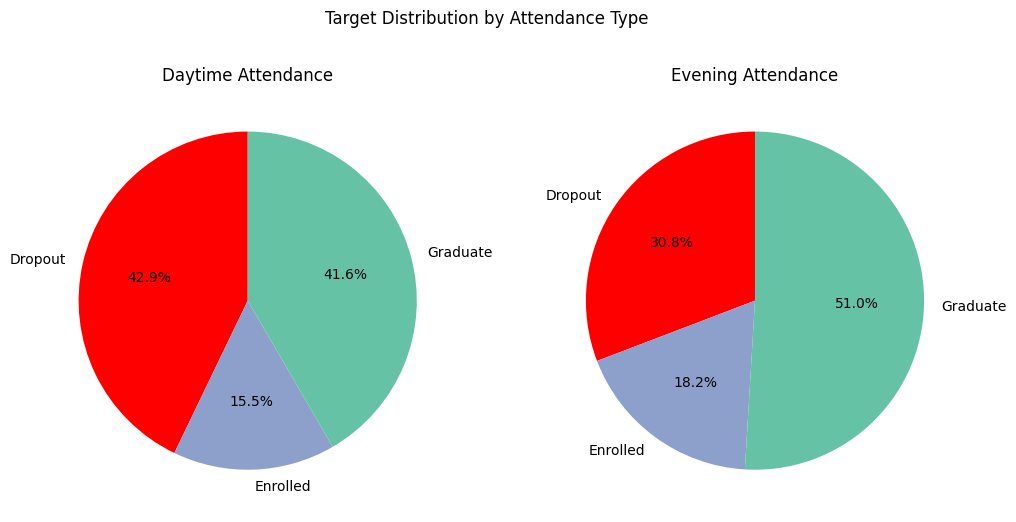

In [15]:
attendance_col = 'Daytime/evening attendance\t'
target_col = 'Target'

categories = ['Dropout', 'Enrolled', 'Graduate']

daytime_counts = df[df[attendance_col] == 0][target_col].value_counts().reindex(categories)
evening_counts = df[df[attendance_col] == 1][target_col].value_counts().reindex(categories)

# Create two side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].pie(daytime_counts, labels=daytime_counts.index, autopct='%1.1f%%', startangle=90, colors=["#ff0000",'#8da0cb','#66c2a5'])
axes[0].set_title('Daytime Attendance')

axes[1].pie(evening_counts, labels=evening_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff0000','#8da0cb','#66c2a5'])
axes[1].set_title('Evening Attendance')

plt.suptitle('Target Distribution by Attendance Type')
plt.show()


this one shows percantage

Same thing but for scholarship (this should be obvious)

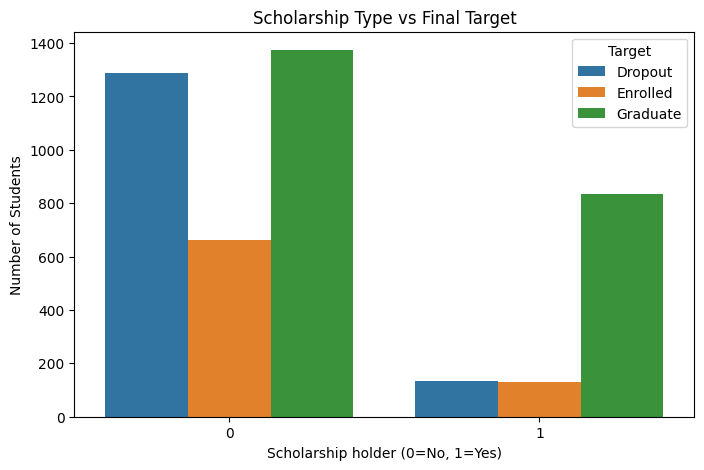

In [16]:
var_col = 'Scholarship holder'  # keep the tab if it's in the column name
target_col = 'Target'

# Count occurrences
counts = df.groupby([var_col, target_col]).size().reset_index(name='count')

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=counts, x=var_col, y='count', hue=target_col)
plt.xlabel('Scholarship holder (0=No, 1=Yes)')
plt.ylabel('Number of Students')
plt.title('Scholarship Type vs Final Target')
plt.legend(title='Target')
plt.show()

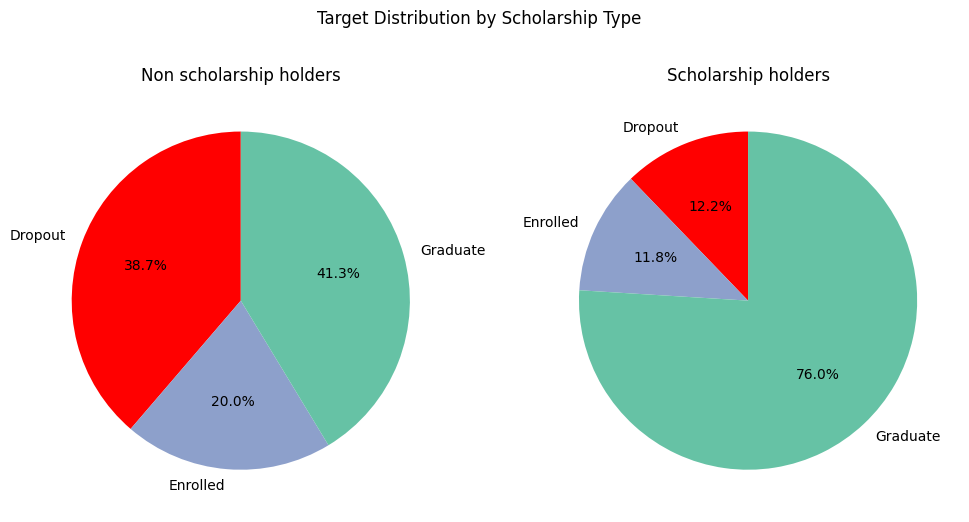

In [17]:
var_col = 'Scholarship holder'  
target_col = 'Target'

categories = ['Dropout', 'Enrolled', 'Graduate']

no = df[df[var_col] == 0][target_col].value_counts().reindex(categories)
yes = df[df[var_col] == 1][target_col].value_counts().reindex(categories)

# Create two side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].pie(no, labels=no.index, autopct='%1.1f%%', startangle=90, colors=["#ff0000",'#8da0cb','#66c2a5'])
axes[0].set_title('Non scholarship holders')

axes[1].pie(yes, labels=yes.index, autopct='%1.1f%%', startangle=90, colors=['#ff0000','#8da0cb','#66c2a5'])
axes[1].set_title('Scholarship holders')

plt.suptitle('Target Distribution by Scholarship Type')
plt.show()


### c. Phát hiện dữ liệu ngoại lai

Sử dụng IQR (Interquartile Range)

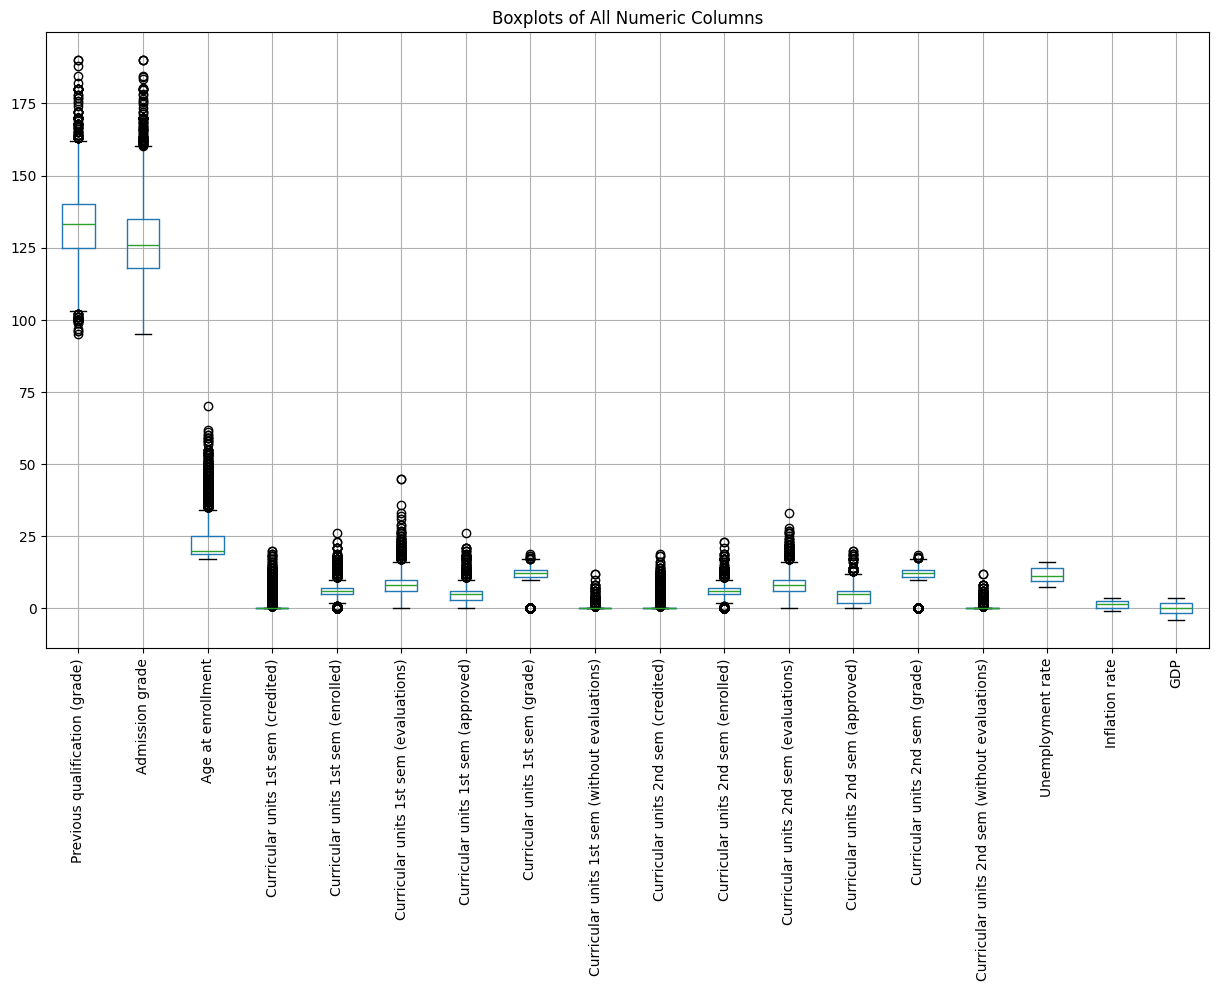

In [18]:
plt.figure(figsize=(15,8))
df_numeric.boxplot(rot=90)  # rot=90 to rotate x-axis labels
plt.title("Boxplots of All Numeric Columns")
plt.show()

**investigating gdp, inflation and unemployment**


In [19]:
new_df = df[['GDP', 'Unemployment rate', 'Inflation rate']]
new_df.describe()

,GDP,Unemployment rate,Inflation rate
count,4424.000000,4424.000000,4424.000000
mean,0.001969,11.566139,1.228029
std,2.269935,2.663850,1.382711
min,-4.060000,7.600000,-0.800000
25%,-1.700000,9.400000,0.300000
50%,0.320000,11.100000,1.400000
75%,1.790000,13.900000,2.600000
max,3.510000,16.200000,3.700000


Knowing that the data comes from the Instituto Politécnico de Portalegre (IPP) in Portugal directly confirms two key points that validate our previous investigation:

Country: The economic data is relevant to Portugal.

Context: The data is from a Portuguese polytechnic institute during a specific time period.

| Metric            | Range (Min to Max) | Confirmed Context                                                                 | Conclusion                                           |
|------------------|-------------------|----------------------------------------------------------------------------------|----------------------------------------------------|
| Unemployment Rate | 7.6% to 16.2%     | Matches the severe economic crisis and subsequent recovery in Portugal (roughly 2008–2018). | Plausible. The highest values are likely accurate historical peaks. |
| Inflation Rate    | -0.8% to 3.7%     | Matches Portugal's largely stable, low-inflation environment during that period, including some deflationary dips. | Plausible. Very stable and reliable data.         |
| GDP               | -4.06 to 3.51     | Matches Portugal's sharp recessionary decline followed by years of recovery growth. | Plausible. Represents real economic volatility.   |


phương pháp xử lý đề xuất (cho mấy cột trên với lại mấy cái course)

***!!!Square Root Transformation!!!***
might or might or have to do this

You only transform the distribution (log/square root) for features that are highly skewed (like GDP and Curricular Units). You must apply scaling to every continuous numeric column to ensure no single variable dominates your model due to its large value range.

***NHẬN XÉT TỔNG QUAN SO FAR***

In [20]:
df_numeric.columns

Index(['Previous qualification (grade)', 'Admission grade',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')

In [21]:
from scipy.stats import norm
import numpy as np

## 2. Phân tích phân phối xác suất

#### Chọn ít nhất hai biến số quan trọng và kiểm tra xem nó có tuân theo phân phối xác suất nào không (chuẩn, Poisson, exponential…) sử dụng biểu đồ phù hợp để minh hoạ.

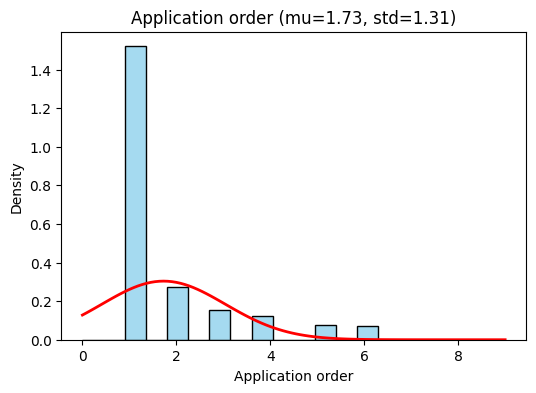

In [22]:
col = "Application order"
data = df[col].dropna()  # drop NaN values
mu, std = norm.fit(data)     # fit a normal distribution

plt.figure(figsize=(6,4))
# Histogram
sns.histplot(data, bins=20, kde=False, color='skyblue', stat='density')
# Plot Gaussian
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

plt.title(f'{col} (mu={mu:.2f}, std={std:.2f})')
plt.xlabel(col)
plt.ylabel('Density')
plt.show()

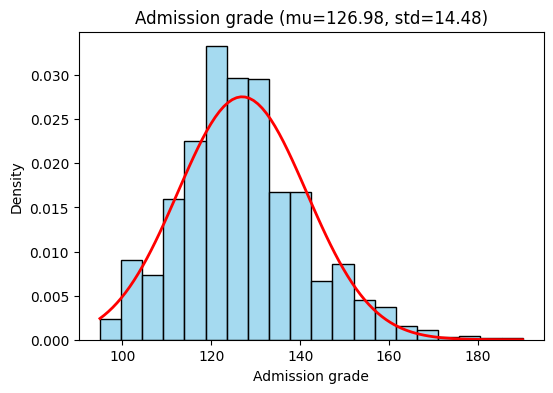

In [23]:
col = "Admission grade"
data = df_numeric[col].dropna()  # drop NaN values
mu, std = norm.fit(data)     # fit a normal distribution

plt.figure(figsize=(6,4))
# Histogram
sns.histplot(data, bins=20, kde=False, color='skyblue', stat='density')
# Plot Gaussian
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

plt.title(f'{col} (mu={mu:.2f}, std={std:.2f})')
plt.xlabel(col)
plt.ylabel('Density')
plt.show()

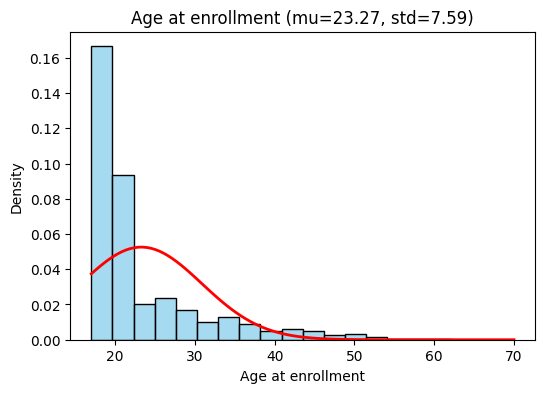

In [24]:
col = "Age at enrollment"
data = df_numeric[col].dropna()  # drop NaN values
mu, std = norm.fit(data)     # fit a normal distribution

plt.figure(figsize=(6,4))
# Histogram
sns.histplot(data, bins=20, kde=False, color='skyblue', stat='density')
# Plot Gaussian
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

plt.title(f'{col} (mu={mu:.2f}, std={std:.2f})')
plt.xlabel(col)
plt.ylabel('Density')
plt.show()

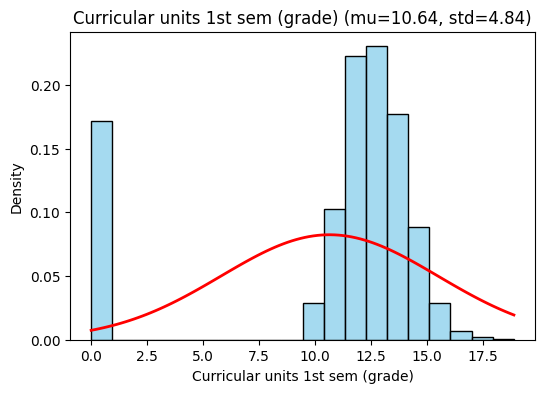

In [25]:
col = "Curricular units 1st sem (grade)"
data = df_numeric[col].dropna()  # drop NaN values
mu, std = norm.fit(data)     # fit a normal distribution

plt.figure(figsize=(6,4))
# Histogram
sns.histplot(data, bins=20, kde=False, color='skyblue', stat='density')
# Plot Gaussian
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

plt.title(f'{col} (mu={mu:.2f}, std={std:.2f})')
plt.xlabel(col)
plt.ylabel('Density')
plt.show()


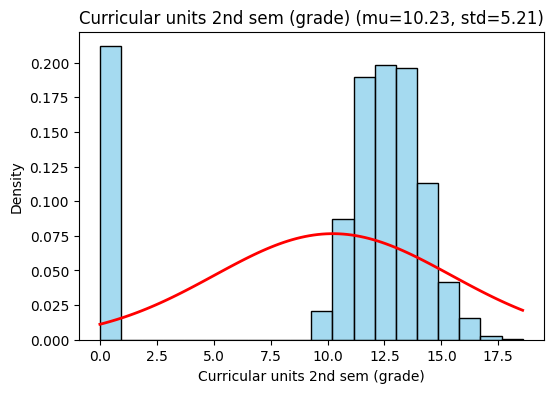

In [38]:
col = "Curricular units 2nd sem (grade)"
data = df_numeric[col].dropna()  # drop NaN values
mu, std = norm.fit(data)     # fit a normal distribution

plt.figure(figsize=(6,4))
# Histogram
sns.histplot(data, bins=20, kde=False, color='skyblue', stat='density')
# Plot Gaussian
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

plt.title(f'{col} (mu={mu:.2f}, std={std:.2f})')
plt.xlabel(col)
plt.ylabel('Density')
plt.show()


## 3. Kiểm định giả thuyết

### a. Tìm hiểu và trình bày các kiểm định thống kê sau: t-test, Chi-square và ANOVA.

### b. Đề xuất hai câu hỏi nghiên cứu có thể kiểm định bằng dữ liệu cho bộ dữ liệu đã chọn

câu hỏi: giới tính khác nhau có ảnh hưởng đến cái dropout rate hay ko

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency

# Tạo bảng tần số (contingency table)
table = pd.crosstab(df['Gender'], df['Target'])
print(table)


Target  Dropout  Enrolled  Graduate
Gender                             
0           720       487      1661
1           701       307       548


In [27]:
chi2, p, dof, expected = chi2_contingency(table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 233.26643249623856
p-value: 2.2224795668092454e-51
Degrees of freedom: 2
Expected frequencies:
 [[ 921.20886076  514.73598553 1432.05515371]
 [ 499.79113924  279.26401447  776.94484629]]


Null hypothesis (H0): Giới tính và kết quả học tập không liên quan (độc lập)

Alternative hypothesis (H1): Có sự phụ thuộc giữa giới tính và kết quả học tập

Nếu p < 0.05 → bác bỏ H0 → có sự khác biệt có ý nghĩa

Nếu p >= 0.05 → không bác bỏ H0 → không có bằng chứng về sự khác biệt

Vì p << 0.05, chúng ta bác bỏ H0 → kết luận:

Có sự khác biệt rất rõ ràng về kết quả học tập giữa nam và nữ. Giới tính và Target không độc lập trong dữ liệu này.

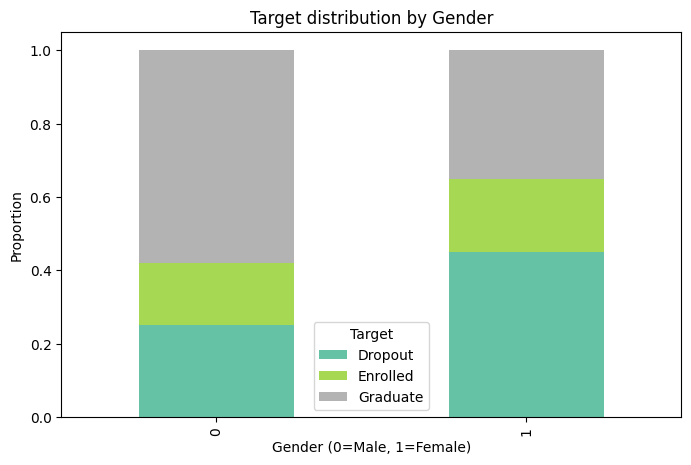

In [28]:

table_norm = table.div(table.sum(axis=1), axis=0)  # chuyển sang tỉ lệ %
table_norm.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')

plt.ylabel("Proportion")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.title("Target distribution by Gender")
plt.show()

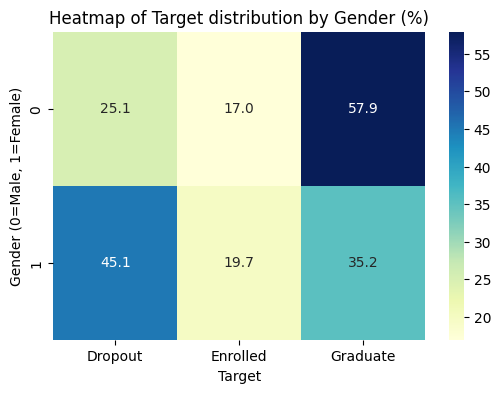

In [29]:
import seaborn as sns

# Bảng tỉ lệ %
table_percent = table.div(table.sum(axis=1), axis=0) * 100

plt.figure(figsize=(6,4))
sns.heatmap(table_percent, annot=True, fmt=".1f", cmap="YlGnBu")
plt.xlabel("Target")
plt.ylabel("Gender (0=Male, 1=Female)")
plt.title("Heatmap of Target distribution by Gender (%)")
plt.show()

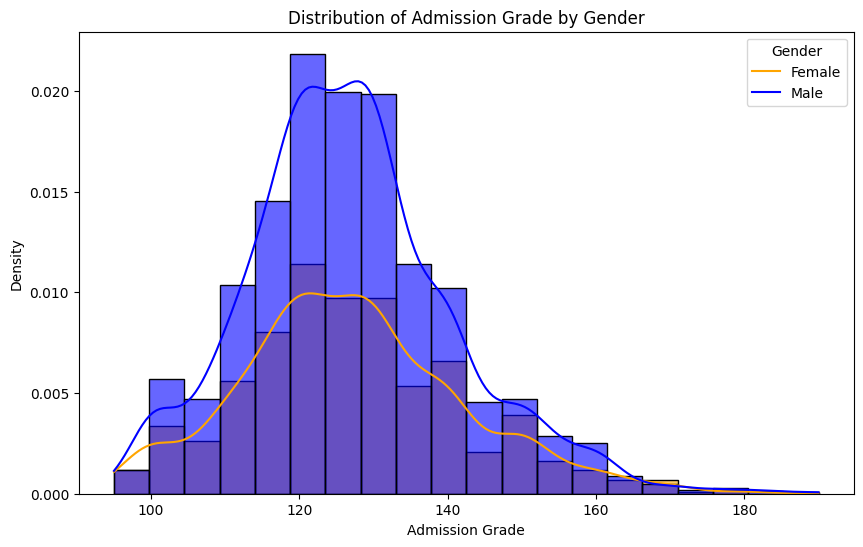

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Admission grade', hue='Gender', 
             bins=20, kde=True, palette=['blue','orange'], alpha=0.6, stat='density')

plt.title('Distribution of Admission Grade by Gender')
plt.xlabel('Admission Grade')
plt.ylabel('Density')
plt.legend(title='Gender', labels=['Female','Male'])
plt.show()

wowza! kết quả cho thấy có sự chênh lệch rõ ràng giữa hai giới tính

### kiểm định khác biệt độ tuồi giữa các nhóm target bằng anova ###

anova cần mấy biến tuân theo phân phối chuẩn, nên t đi check coi chuẩn ko

In [30]:
from scipy.stats import shapiro
from scipy.stats import levene

groups = df.groupby('Target')['Age at enrollment']

for name, group_data in groups:
    stat, p = shapiro(group_data.dropna())  # drop NA values
    print(f"{name}: W={stat:.3f}, p={p:.3f}")

groups = [group.dropna() for name, group in df.groupby('Target')['Age at enrollment']]

stat, p = levene(*groups)
print(f"Levene’s test: W={stat:.3f}, p={p:.3f}")


Dropout: W=0.840, p=0.000
Enrolled: W=0.685, p=0.000
Graduate: W=0.592, p=0.000
Levene’s test: W=117.322, p=0.000


⚠️ This violates the normality assumption for ANOVA.

⚠️ This violates the homogeneity of variance assumption for ANOVA.

Since both normality and equal variance assumptions are violated, one-way ANOVA is NOT appropriate here.

✅ Correct approach:
Use a non-parametric alternative like Kruskal-Wallis test, which does not assume normality or equal variances.

In [31]:
from scipy.stats import kruskal

dropout_age = df[df['Target']=='Dropout']['Age at enrollment']
enrolled_age = df[df['Target']=='Enrolled']['Age at enrollment']
graduate_age = df[df['Target']=='Graduate']['Age at enrollment']

stat, p = kruskal(dropout_age, enrolled_age, graduate_age)
print(f"Kruskal-Wallis test: H={stat:.3f}, p={p:.3e}")



Kruskal-Wallis test: H=375.107, p=3.520e-82


Since p << 0.05, you reject the null hypothesis. This means there is a statistically significant difference between at least one pair of your groups.

Minh họa

C:\Users\hjiis\AppData\Local\Temp\ipykernel_10752\2980619216.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Target', y='Age at enrollment', data=plot_df, palette="Set3")


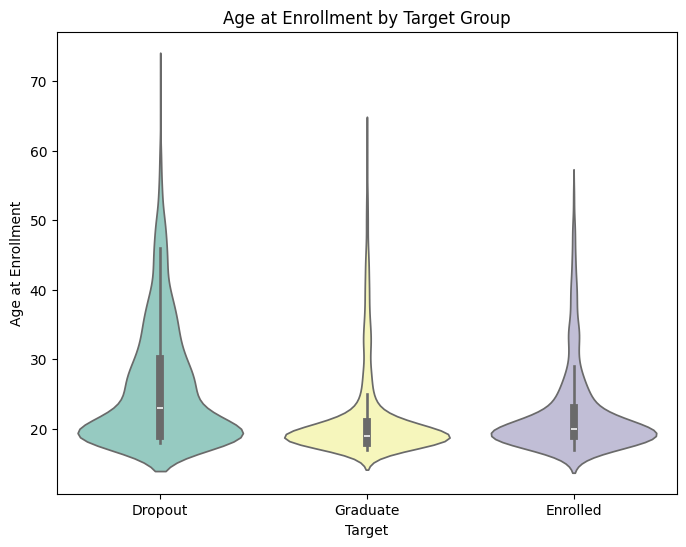

In [32]:
# Create a DataFrame for plotting
plot_df = df[['Target', 'Age at enrollment']].dropna()

plt.figure(figsize=(8,6))
sns.violinplot(x='Target', y='Age at enrollment', data=plot_df, palette="Set3")
plt.title("Age at Enrollment by Target Group")
plt.ylabel("Age at Enrollment")
plt.xlabel("Target")
plt.show()


Kết luận: Dữ liệu cho thấy mối quan hệ nghịch đảo giữa độ tuổi nhập học và khả năng tốt nghiệp. Về mặt thống kê, những sinh viên nhập học ở độ tuổi truyền thống sớm hơn có khả năng hoàn thành chương trình học cao hơn nhiều so với những sinh viên nhập học muộn hơn.

## 4. Phân tích tương quan giữa các biến

## 5. Hồi quy đa biến (Multiple Linear Regression)

### a. Tìm hiểu và trình bày lý thuyết về Hồi quy đa biến.

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of MLR is to model the linear relationship between the explanatory (independent) variables and response (dependent) variables. In essence, multiple regression is the extension of ordinary least-squares (OLS) regression because it involves more than one explanatory variable.

Ở đây ta định nghĩa rằng biến phụ thuộc là Curricular units 2nd sem (grade) (điểm bình quân học kỳ 2 từ 0 tới 20) và các biến còn lại là biến phụ thuộc để minh họa cho hồi quy đa biến do Target của tập dữ liệu là biến định tính (nghỉ học, đang học, tốt nghiệp).

**Phát hiện đa cộng tuyến trước khi áp dụng các biến vào mô hình hồi quy**

In [33]:
# Create categorical Dataframe to apply one hot encoding
df_categorical = df[cat_columns].copy()
df_categorical_encoded = pd.get_dummies(df_categorical, drop_first=True, dtype=float)

# Combine both categorical columns and numeric columns
X = pd.concat([df_categorical_encoded, df_numeric], axis=1)

# 1. Add a constant (Intercept)
# This is required for the VIF calculation in statsmodels to work correctly
X = add_constant(X)

# 2. Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# 3. Sort by VIF score to see the worst offenders
print(vif_data.sort_values(by="VIF", ascending=False))

                                           Feature         VIF
0                                            const  248.002989
25             Curricular units 1st sem (enrolled)   24.486766
31             Curricular units 2nd sem (enrolled)   17.535075
24             Curricular units 1st sem (credited)   16.262849
27             Curricular units 1st sem (approved)   13.388045
30             Curricular units 2nd sem (credited)   12.628934
33             Curricular units 2nd sem (approved)   12.003116
10                             Mother's occupation    5.991526
11                             Father's occupation    5.972380
34                Curricular units 2nd sem (grade)    5.858676
28                Curricular units 1st sem (grade)    5.209262
26          Curricular units 1st sem (evaluations)    4.025174
32          Curricular units 2nd sem (evaluations)    3.442417
20                                 Target_Graduate    3.247417
18                                   International    2

In [34]:
# 1. Define the variables you want to test
# (Combine your numeric predictors + the categorical ones you want to test)
# WARNING: 'Course' and 'Occupation' have MANY categories. 
# Including them might create 100+ columns. Start with simpler ones like 'Marital status'.
cat_cols = ['Marital status', 'Application mode'] 
num_cols = ['Age at enrollment', 'GDP', 'Curricular units 1st sem (grade)']

# 2. Select data
X = df[cat_cols + num_cols].copy()

# 3. CRITICAL STEP: Convert categorical numbers to Strings
# This tells pandas: "Treat '1' as a name, not a number"
X[cat_cols] = X[cat_cols].astype(str)

# 4. Now get_dummies will actually work
X_encoded = pd.get_dummies(X, drop_first=True, dtype=float)

# 5. Add Constant
X_encoded = add_constant(X_encoded)

# 6. Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(X_encoded.values, i) for i in range(len(X_encoded.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

                             Feature        VIF
0                              const  28.049982
1                  Age at enrollment   2.908730
17               Application mode_39   2.382931
4                   Marital status_2   1.566519
19               Application mode_43   1.251508
25                Application mode_7   1.230155
12               Application mode_17   1.214595
6                   Marital status_4   1.189481
20               Application mode_44   1.083994
2                                GDP   1.070724
18               Application mode_42   1.068991
22               Application mode_51   1.056006
3   Curricular units 1st sem (grade)   1.050502
13               Application mode_18   1.044862
23               Application mode_53   1.035477
7                   Marital status_5   1.025121
10               Application mode_15   1.020701
8                   Marital status_6   1.019712
16               Application mode_27   1.019253
11               Application mode_16   1

### b. Xây dựng và đánh giá mô hình hồi quy tuyến tính đa biến nhằm dự đoán một biến phụ thuộc (biến mục tiêu) dựa trên nhiều biến độc lập trong bộ dữ liệu đã chọn.

In [35]:
# Predict 'Curricular units 2nd sem (grade)' based on other factors
target_col = "Curricular units 2nd sem (grade)"
features = [
    "Age at enrollment",
    "Curricular units 1st sem (grade)",
    "GDP",
]

X = df[features]
y = df[target_col]

# Add constant
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

# Save summary to file
with open("regression_summary.txt", "w") as f:
    f.write(model.summary().as_text())

                                   OLS Regression Results                                   
Dep. Variable:     Curricular units 2nd sem (grade)   R-squared:                       0.703
Model:                                          OLS   Adj. R-squared:                  0.703
Method:                               Least Squares   F-statistic:                     3491.
Date:                              Fri, 28 Nov 2025   Prob (F-statistic):               0.00
Time:                                      23:25:51   Log-Likelihood:                -10893.
No. Observations:                              4424   AIC:                         2.179e+04
Df Residuals:                                  4420   BIC:                         2.182e+04
Df Model:                                         3                                         
Covariance Type:                          nonrobust                                         
                                       coef    std err          t     

In [36]:
# Predict 'Curricular units 2nd sem (grade)' based on other factors
target_col = "Curricular units 2nd sem (grade)"
features = [
    "Age at enrollment",
    "Curricular units 1st sem (grade)",
    "GDP",
]

X = df[features]
y = df[target_col]

# Add constant
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

# Save summary to file
with open("regression_summary.txt", "w") as f:
    f.write(model.summary().as_text())

                                   OLS Regression Results                                   
Dep. Variable:     Curricular units 2nd sem (grade)   R-squared:                       0.703
Model:                                          OLS   Adj. R-squared:                  0.703
Method:                               Least Squares   F-statistic:                     3491.
Date:                              Fri, 28 Nov 2025   Prob (F-statistic):               0.00
Time:                                      23:25:52   Log-Likelihood:                -10893.
No. Observations:                              4424   AIC:                         2.179e+04
Df Residuals:                                  4420   BIC:                         2.182e+04
Df Model:                                         3                                         
Covariance Type:                          nonrobust                                         
                                       coef    std err          t     